# Importing libraries

In [22]:
import os
import numpy as np
from numpy import genfromtxt
import math
import random
import matplotlib.pyplot as plt

# Loading data and assignment 

In [8]:
path = os.getcwd() + '/Problem_3'
dataset = genfromtxt(path + '/Wage_dataset.csv', delimiter=',')

wage = dataset[:,-1]
age = dataset[:,1]
edu = dataset[:,4]
year = dataset[:,0]

# Defining Mean Square root Function

In [9]:
def Mean_square_error(act,predict):
    sum=0
    for i in range(len(act)):
        sum=sum+(act[i][0]-predict[i][0])*(act[i][0]-predict[i][0])
    return float(sum)/float(len(act))

# Seperating The dataset into train and test with ratio 80:20 

In [10]:
length=int(len(age)*0.8)
trainage=np.matrix(age[0:length])
trainage=trainage.transpose().tolist()

trainwage=np.matrix(wage[0:length])
trainwage=trainwage.transpose().tolist()

testage=np.matrix(age[length:])
testage=testage.transpose().tolist()

testwage=np.matrix(wage[length:])
testwage=testwage.transpose().tolist()

testyear=np.matrix(year[length:])
testyear=testyear.transpose().tolist()

trainyear=np.matrix(wage[0:length])
trainyear=trainyear.transpose().tolist()

# Initializing variables 

In [12]:
kmin_age=0
min_Age=0
kmin_year=0
min_Year=0
e_age=[]
e_year=[]
K_array=[]

# Construcitng A and Age Vs Wage Prediction, Year Vs Wage prediction and finding the min degree of polynomial 

for deciding the degree, i started with 10 then went on to 15 and saw the trend in mean square error

In [25]:
for k in range(1,15):
    print 'K=',k
    K_array.append(k)
    
    #Age vs Wage Prediction
    A=[]
    for i in trainage:
        row=[]
        for l in range(k):
            row.append(i[0]**l)
        A.append(row)
    A=np.matrix(A)
    R=np.matrix(trainwage)
    w=np.linalg.inv(np.transpose(A)*A)*np.transpose(A)*R
    Xtest=[]
    for i in testage:
        row=[]
        for j in range(k):
            row.append(i[0]**j)
        Xtest.append(row)
    Ypred=Xtest*w
    print "Mean Square Error for Age prediction"
    error= Mean_square_error(testwage,Ypred)
    print error
    e_age.append(error)
    if (k==1):
        min_Age=error
    if (min_Age>error):
        min_Age=error
        kmin_age=k


    #Year vs Wage Prediction
    AY=[]
    for i in trainyear:
        row=[]
        for z in range(k):
            row.append(i[0]**z)
        AY.append(row)
    AY=np.matrix(AY)
    R=np.matrix(trainyear)
    W=np.linalg.inv(np.transpose(AY)*AY)*np.transpose(AY)*R
    Xtest=[]
    for i in testyear:
        row=[]
        for j in range(k):
            row.append(i[0]**j)
        Xtest.append(row)
    Ypred=Xtest*W
    print "Mean Square Error for Year prediction"
    error= Mean_square_error(testyear,Ypred)
    print error
    e_year.append(error)
    if (k==1):
        min_Year=error
    if (min_Year>error):
        min_Year=error
        kmin_year=k

K= 1
Mean Square Error for Age prediction
1811.1787497
Mean Square Error for Year prediction
3587622.27268
K= 2
Mean Square Error for Age prediction
1720.87994104
Mean Square Error for Year prediction
1.86115637824e-24
K= 3
Mean Square Error for Age prediction
1664.64741002
Mean Square Error for Year prediction
1.93055707979e-19
K= 4
Mean Square Error for Age prediction
1661.94072889
Mean Square Error for Year prediction
3.17480622285e-15
K= 5
Mean Square Error for Age prediction
1657.20451769
Mean Square Error for Year prediction
9.52203563374e-11
K= 6
Mean Square Error for Age prediction
1656.47055692
Mean Square Error for Year prediction
3.50065427072e-07
K= 7
Mean Square Error for Age prediction
1652.96075022
Mean Square Error for Year prediction
0.000110328058904
K= 8
Mean Square Error for Age prediction
1651.4182793
Mean Square Error for Year prediction
1692.02832975
K= 9
Mean Square Error for Age prediction
1651.30336327
Mean Square Error for Year prediction
4175948.32415
K= 10


# Order of Polynomial : Age Vs Wage

In [23]:
kmin_age

9

# Order of Polynomial : Year Vs Wage

In [24]:
kmin_year

2

# Plot 1 : education vs wage

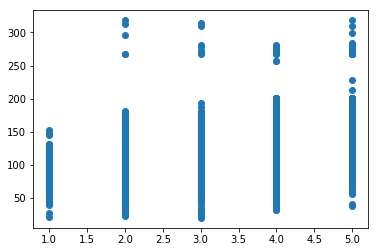

In [3]:
plt.figure(1)
plt.scatter(edu,wage)
plt.show()

# Plot 2 

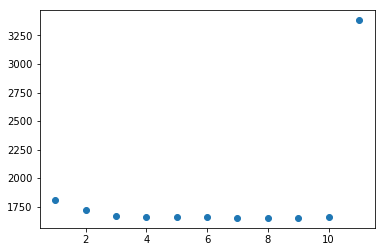

In [4]:
plt.figure(2)
plt.scatter(K_array,e_age)
plt.show()

# Plot 3 

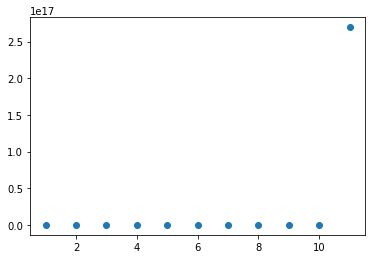

In [5]:
plt.figure(3)
plt.scatter(K_array,e_year)
plt.show()